In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import matplotlib as mpl
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import sem
from scipy.optimize import curve_fit

%matplotlib inline

In [3]:
data = pd.read_csv('data/FAK_delta_peaks.csv')
data.describe()

,delta
count,65.000000
mean,0.210803
std,0.041497
min,0.128900
25%,0.193400
50%,0.194900
75%,0.225700
max,0.322400


## Histograma dos dados

[19.33405337  0.19765553  0.04978939]


<Figure size 1000x1000 with 0 Axes>

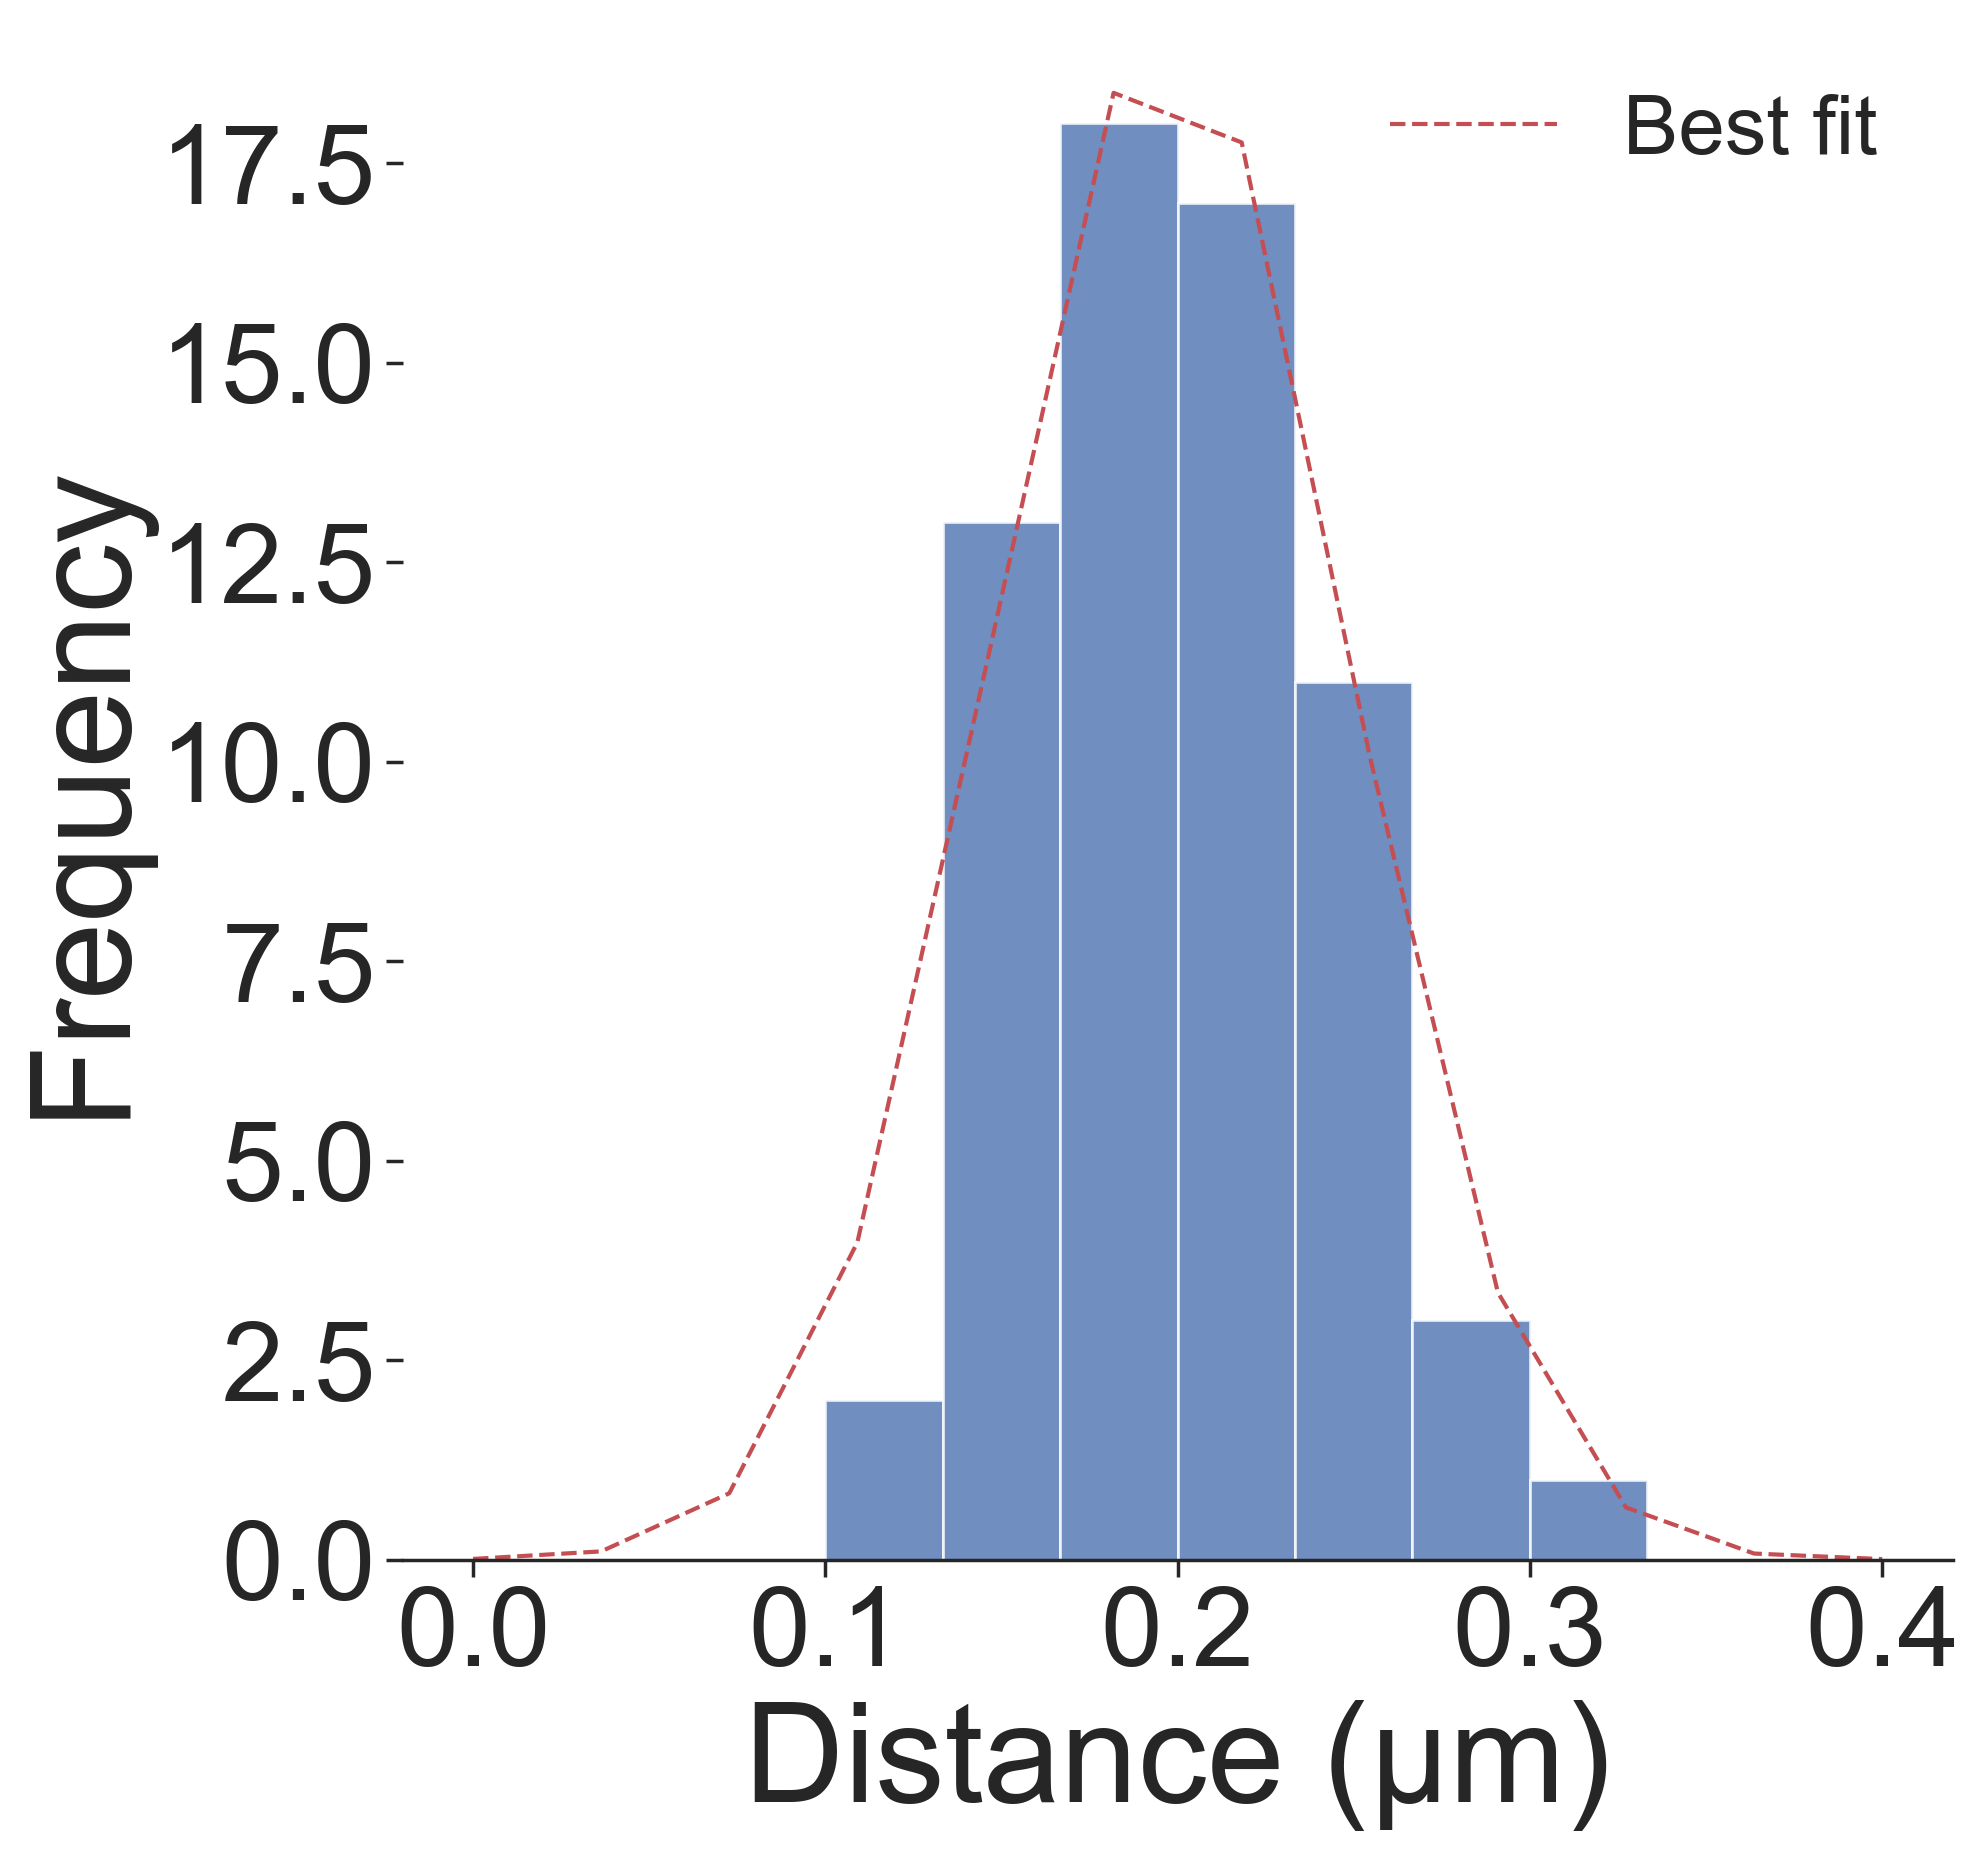

In [3]:
def gauss(x,amplitude,mu,sigma):
    return amplitude*np.exp(-(x-mu)**2/(2*sigma**2))

nome_figura = 'histogram_fakcircular_peaktopeak_space_8'
label_eixo_y = 'Frequency'
label_eixo_x = 'Distance (µm)'
tamanho_label = 50
tamanho_ticks = 40

sns.set(rc={"figure.figsize":(10, 10)}) # width=20, height=20
sns.set(font_scale = 2)

sns.despine()
sns.set_style("ticks")
fig, ax = plt.subplots(dpi=200);
n, bins, patches = plt.hist(data=data, x="delta", bins=12, range=[0.00,0.4], alpha=0.8)
# print(n,bins, patches)

x = np.linspace(0.00, .4, 12)
y = n

popt, pcov = curve_fit(gauss, x, y,p0=(17,.2,.1))

print(popt)

d = gauss(x,popt[0], popt[1], popt[2])

plt.plot(x,d, color = 'r', linestyle='dashed', label='Best fit')
plt.xticks(size=tamanho_ticks)
plt.yticks(size=tamanho_ticks)
plt.ylabel(label_eixo_y, fontsize = tamanho_label)
plt.xlabel(label_eixo_x, fontsize = tamanho_label)
ax.spines[['top','right', 'left']].set_visible(False)
plt.legend(fontsize=tamanho_ticks-10, shadow=False, frameon=False)

plt.savefig(nome_figura + ".pdf",bbox_inches='tight') #salvar em .pdf pra sempre ter uma resolução infinita
plt.savefig(nome_figura + ".jpeg",bbox_inches='tight')


plt.show()